Data Preparation

In [1]:
import pandas as pd
file_path = 'HotelCustomersDataset.tsv' 
df = pd.read_csv(file_path, sep='\t')




In [2]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
# sumarise basic stat from the dataset


   ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  51.0                150   
1   2         PRT   NaN               1095   
2   3         DEU  31.0               1095   
3   4         FRA  60.0               1095   
4   5         FRA  51.0               1095   

                                            NameHash  \
0  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1  0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3  0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4  0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   

                                           DocIDHash  AverageLeadTime  \
0  0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...               45   
1  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   
2  0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...                0   
3  0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...               93   
4  0xE175754CF77247B2

Data Cleanning

Duplicate Rows

In [3]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Calculate the percentage of duplicate rows
duplicate_percentage = (duplicate_rows.shape[0] / len(df)) * 100

# Display the results
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")


Number of duplicate rows: 0
Percentage of duplicate rows: 0.00%


Missing Values

In [4]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Calculate percentage of missing values only for columns with missing data
missing_percentage = (missing_values / len(df)) * 100

# Print the results
print("Columns with missing values and their count:")
print(missing_values)

print("\nPercentage of missing values in columns with missing data:")
print(missing_percentage.apply(lambda x: f"{x:.4f}%"))

Columns with missing values and their count:
Age    3779
dtype: int64

Percentage of missing values in columns with missing data:
Age    4.5209%
dtype: object


Negative Values

In [5]:
# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Identify columns with negative values
negative_values = numerical_df < 0

# Get the count of negative values in each column
negative_value_counts = negative_values.sum()

# Calculate percentage of negative values only for columns with negative values
negative_percentage = (negative_value_counts / len(df)) * 100

# Filter to show only columns with negative values
columns_with_negative_values = negative_value_counts[negative_value_counts > 0]
negative_percentage_filtered = negative_percentage[negative_value_counts > 0]

# Display columns with negative values and their counts
print("Columns with negative values and their counts:")
print(columns_with_negative_values)

print("\nPercentage of negative values in columns with negative data:")
print(negative_percentage_filtered.apply(lambda x: f"{x:.4f}%"))


Columns with negative values and their counts:
Age                      17
AverageLeadTime          10
DaysSinceLastStay     19920
DaysSinceFirstStay    19920
dtype: int64

Percentage of negative values in columns with negative data:
Age                    0.0203%
AverageLeadTime        0.0120%
DaysSinceLastStay     23.8306%
DaysSinceFirstStay    23.8306%
dtype: object


Deal Any Missing Values and Duplicates

In [6]:
# Drop any rows with missing values in the 'Age' column and drop any duplicate rows
df.dropna(subset=['Age'], inplace=True)
df.drop_duplicates(inplace=True)

# Display the updated DataFrame shape
print(f"DataFrame shape after dropping missing 'Age' values and duplicates: {df.shape}")

print(df.head())


DataFrame shape after dropping missing 'Age' values and duplicates: (79811, 31)
   ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  51.0                150   
2   3         DEU  31.0               1095   
3   4         FRA  60.0               1095   
4   5         FRA  51.0               1095   
5   6         JPN  54.0               1095   

                                            NameHash  \
0  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
2  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3  0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4  0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   
5  0x6E70C1504EB27252542F58E4D3C8C83516E093334721...   

                                           DocIDHash  AverageLeadTime  \
0  0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...               45   
2  0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...                0   
3  0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...               93   
4  0xE175754CF

In [7]:
# Verify that missing values are dropped
missing_values_after_drop = df.isnull().sum()

print("Missing values after dropping rows with missing 'Age' values and duplicates:")
print(missing_values_after_drop)


Missing values after dropping rows with missing 'Age' values and duplicates:
ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64


Deal with Any Negative Values

In [8]:
# Drop rows where 'Age' or 'AverageLeadTime' have negative values
df = df[(df['Age'] >= 0) & (df['AverageLeadTime'] >= 0)]


#  Drop the 'DaysSinceFirstStay' and 'DaysSinceLastStay' columns entirely
df.drop(columns=['DaysSinceFirstStay', 'DaysSinceLastStay'], inplace=True)

# Verify the change by checking the remaining columns
print("Remaining columns after dropping 'DaysSinceFirstStay' and 'DaysSinceLastStay':")
print(df.columns)

Remaining columns after dropping 'DaysSinceFirstStay' and 'DaysSinceLastStay':
Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')


Recheck Any Missing, Negative, Duplicate Values

In [9]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include='object'))


                 ID           Age  DaysSinceCreation  AverageLeadTime  \
count  79785.000000  79785.000000       79785.000000     79785.000000   
mean   42331.615805     45.409062         446.422097        66.798797   
std    24011.329806     16.556461         310.594124        87.976927   
min        1.000000      0.000000           0.000000         0.000000   
25%    21690.000000     34.000000         174.000000         0.000000   
50%    42387.000000     46.000000         385.000000        30.000000   
75%    63199.000000     57.000000         703.000000       104.000000   
max    83590.000000    122.000000        1095.000000       588.000000   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
count    79785.000000  79785.000000      79785.000000      79785.000000   
mean       302.184450     67.960983          0.001842          0.000577   
std        368.063977    112.650911          0.065923          0.028317   
min          0.000000      0.000000       

In [10]:
# Print all column names to inspect
print(df.columns)


Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')


In [11]:
# Inspect non-numerical columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numerical columns:", non_numeric_columns)

numeric_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numeric_columns)


Non-numerical columns: Index(['Nationality', 'NameHash', 'DocIDHash', 'DistributionChannel',
       'MarketSegment'],
      dtype='object')
Numerical columns: Index(['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')


Rename Column

In [12]:
#  Rename the column "Segment" to "Customer Type"
df.rename(columns={'MarketSegment': 'Customer Type'}, inplace=True)

Data Preparing With CLV

In [13]:
# Calculate CLV as the sum of LodgingRevenue and OtherRevenue
df['CLV'] = df['LodgingRevenue'] + df['OtherRevenue']

# Display the first few rows to verify the calculation
print(df[['LodgingRevenue', 'OtherRevenue', 'CLV']].head())


   LodgingRevenue  OtherRevenue    CLV
0           371.0         105.3  476.3
2             0.0           0.0    0.0
3           240.0          60.0  300.0
4             0.0           0.0    0.0
5           230.0          24.0  254.0


Data Preparing With Nationality Label-Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and it contains a 'Nationality' column

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'Nationality' column
df['Nationality_numeric'] = label_encoder.fit_transform(df['Nationality'])

# Reorder the columns to move 'Nationality_numeric' next to 'Nationality'
columns = list(df.columns)
columns.insert(columns.index('Nationality') + 1, columns.pop(columns.index('Nationality_numeric')))
df = df[columns]

# Display the first few rows to see the encoded 'Nationality_numeric' column
print(df[['Nationality', 'Nationality_numeric']].head(20))


   Nationality  Nationality_numeric
0          PRT                  137
2          DEU                   43
3          FRA                   57
4          FRA                   57
5          JPN                   87
6          JPN                   87
7          FRA                   57
8          FRA                   57
9          IRL                   78
10         IRL                   78
11         FRA                   57
12         FRA                   57
13         ESP                   51
14         ESP                   51
15         FRA                   57
16         FRA                   57
17         FRA                   57
18         FRA                   57
19         FRA                   57
21         BEL                   15


In [15]:
print(list(df.columns))

['ID', 'Nationality', 'Nationality_numeric', 'Age', 'DaysSinceCreation', 'NameHash', 'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DistributionChannel', 'Customer Type', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'CLV']


In [16]:
# Get the list of columns in the DataFrame
columns = list(df.columns)

# Remove 'CLV' from its current position
columns.remove('CLV')

# Find the position of 'OtherRevenue' and insert 'CLV' after it
other_revenue_index = columns.index('OtherRevenue')
columns.insert(other_revenue_index + 1, 'CLV')

# Reorder the DataFrame columns
df = df[columns]

# Verify the change by printing the updated list of columns
print(df.columns)


Index(['ID', 'Nationality', 'Nationality_numeric', 'Age', 'DaysSinceCreation',
       'NameHash', 'DocIDHash', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'CLV', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'Customer Type', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')


In [17]:
# Verify that CLV has been added correctly
print(df.columns)
print(df.head)

Index(['ID', 'Nationality', 'Nationality_numeric', 'Age', 'DaysSinceCreation',
       'NameHash', 'DocIDHash', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'CLV', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'Customer Type', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')
<bound method NDFrame.head of           ID Nationality  Nationality_numeric   Age  DaysSinceCreation  \
0          1         PRT                  137  51.0                150   
2          3         DEU                   43  31.0               1095   
3          4         FRA                   57  60.0               1095   
4          5         FRA                   57  51.0               1095   
5          6         J

EDA 

Distribution analysis
 Overview

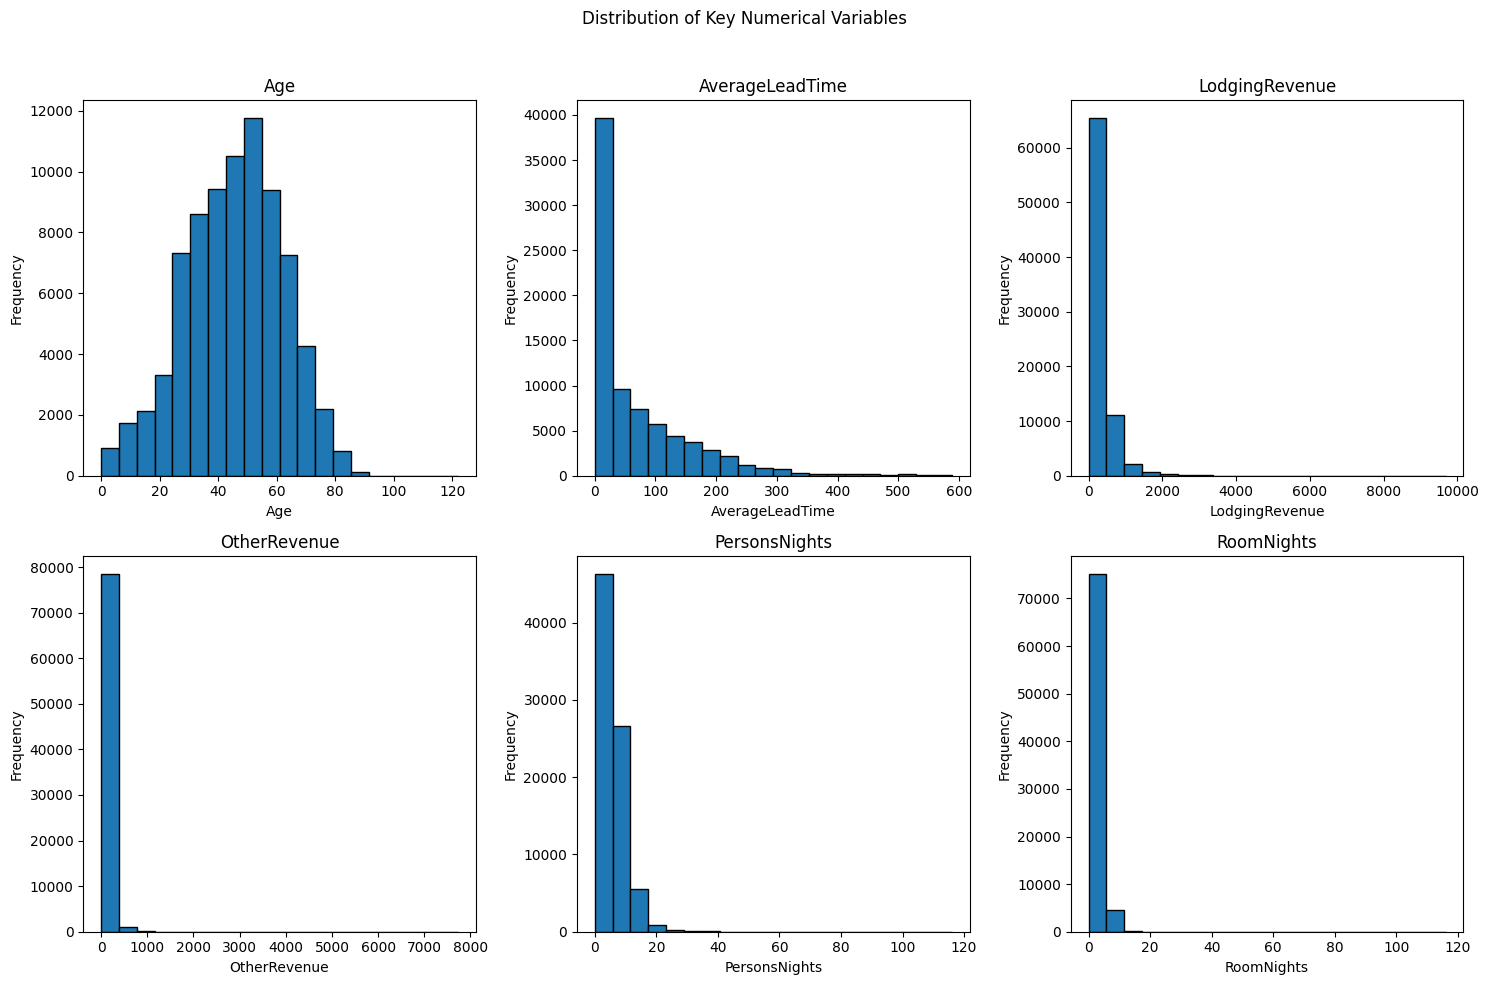

In [18]:
import matplotlib.pyplot as plt

# List of key numerical columns to analyze
numerical_columns = ['Age' ,'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights']

# Plotting the distribution of key numerical variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Variables')

for i, column in enumerate(numerical_columns):
    axs[i//3, i%3].hist(df[column].dropna(), bins=20, edgecolor='black')
    axs[i//3, i%3].set_title(column)
    axs[i//3, i%3].set_xlabel(column)
    axs[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Outliner


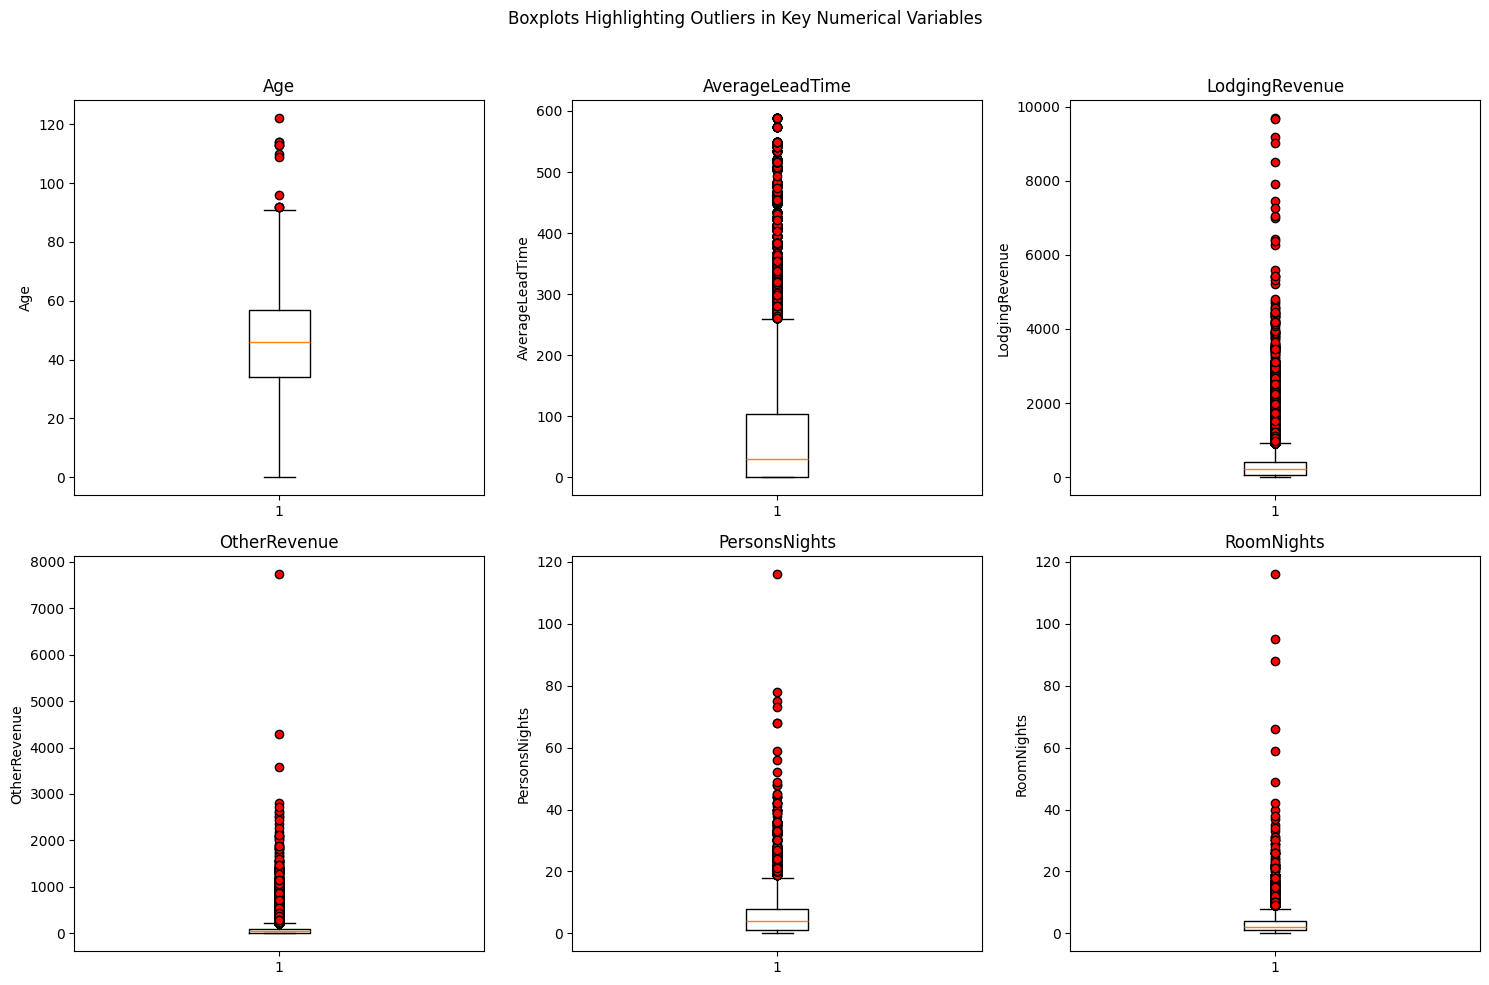

In [19]:
# List of key numerical columns to analyze
numerical_columns = ['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights']

# Plotting the boxplots to show outliers
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplots Highlighting Outliers in Key Numerical Variables')

for i, column in enumerate(numerical_columns):
    axs[i//3, i%3].boxplot(df[column].dropna(), flierprops={'markerfacecolor':'red', 'marker':'o'})
    axs[i//3, i%3].set_title(column)
    axs[i//3, i%3].set_ylabel(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Distribution and Outlier


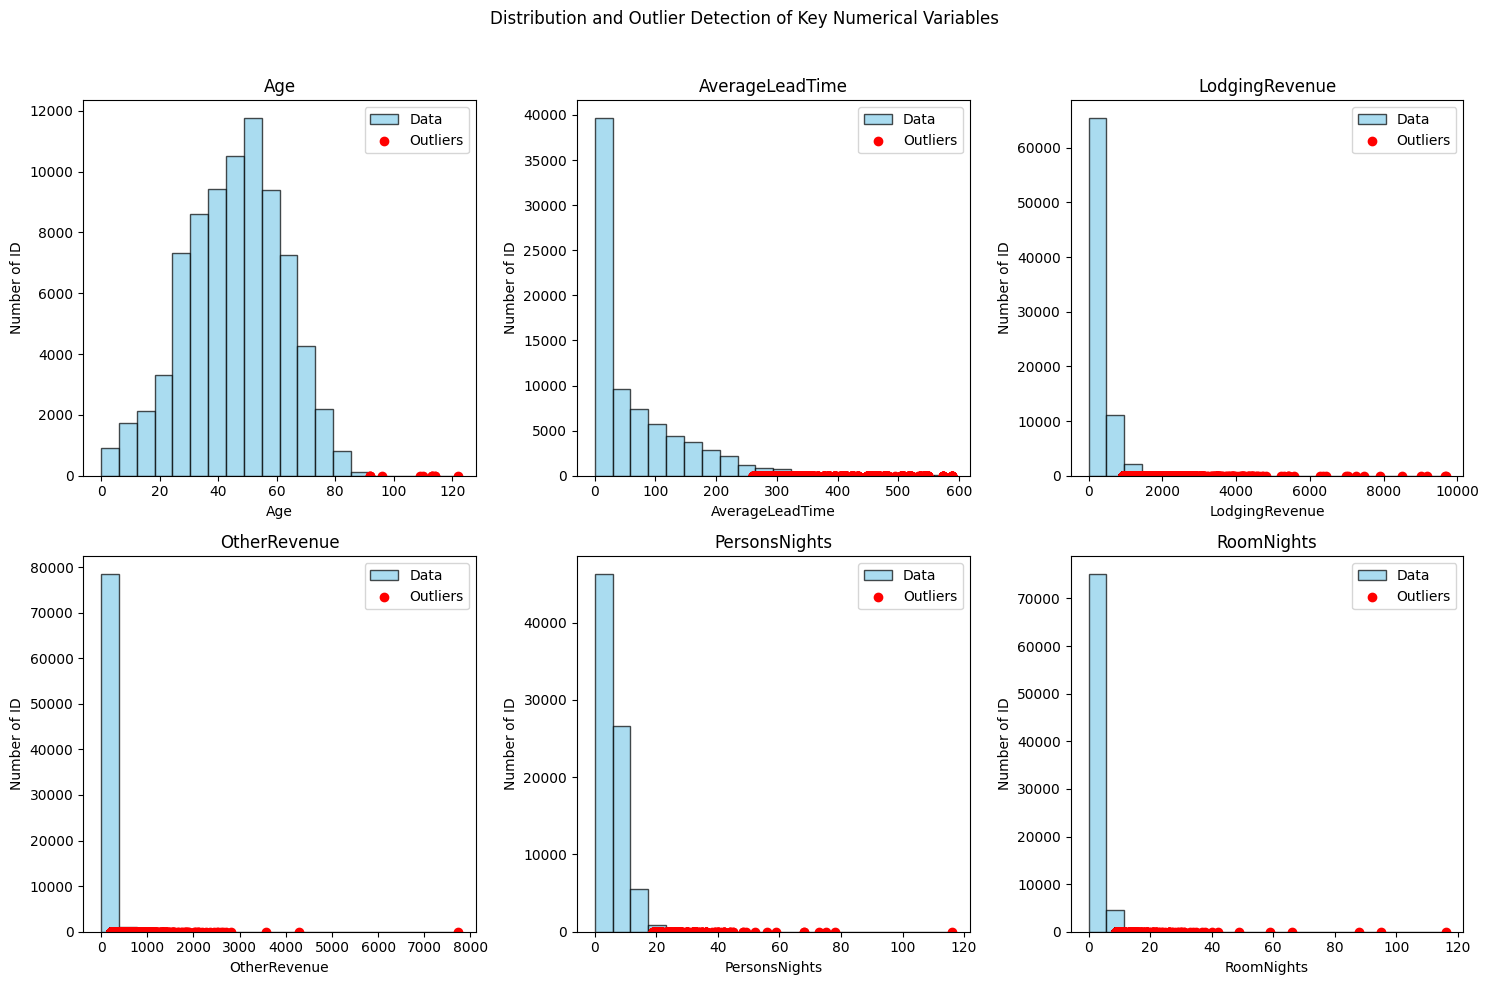

In [20]:

import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# List of key numerical columns to analyze
numerical_columns = ['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights']

# Plotting the distribution and outlier detection for key numerical variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution and Outlier Detection of Key Numerical Variables')

for i, column in enumerate(numerical_columns):
    data = df[column].dropna()
    outliers = detect_outliers_iqr(data)
    
    axs[i//3, i%3].hist(data, bins=20, edgecolor='black', color='skyblue', alpha=0.7, label='Data')
    axs[i//3, i%3].scatter(outliers, np.zeros_like(outliers), color='red', label='Outliers')
    axs[i//3, i%3].set_title(column)
    axs[i//3, i%3].set_xlabel(column)
    axs[i//3, i%3].set_ylabel('Number of ID')
    axs[i//3, i%3].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Count Number of Outlier

In [21]:

# Function to detect and count outliers using the IQR method
def count_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

# List of key numerical columns to analyze
numerical_columns = ['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights']

# Dictionary to store the count of outliers for each column
outliers_count = {}

# Counting outliers for each relevant column
for column in numerical_columns:
    data = df[column].dropna()
    outliers_count[column] = count_outliers_iqr(data)

# Displaying the results
outliers_count


{'Age': 12,
 'AverageLeadTime': 3173,
 'LodgingRevenue': 3722,
 'OtherRevenue': 4782,
 'PersonsNights': 966,
 'RoomNights': 632}

Correlation Analysis


In [22]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Recalculate the correlation matrix including the new CLV column
corr_matrix = numerical_df.corr()

# Display the updated correlation matrix sorted by the CLV column
print(corr_matrix['CLV'].sort_values(ascending=False))

CLV                     1.000000
LodgingRevenue          0.976330
OtherRevenue            0.707542
RoomNights              0.692563
PersonsNights           0.688217
BookingsCheckedIn       0.420588
AverageLeadTime         0.246276
DaysSinceCreation       0.120242
Age                     0.075183
BookingsCanceled        0.064471
BookingsNoShowed        0.059130
SRQuietRoom             0.048670
SRAwayFromElevator      0.013340
SRShower                0.013281
SRHighFloor             0.012920
SRKingSizeBed           0.009473
SRTwinBed               0.008361
SRMediumFloor           0.006868
SRBathtub               0.004673
SRLowFloor              0.004363
SRNearElevator          0.003751
SRNoAlcoholInMiniBar    0.000424
SRAccessibleRoom        0.000008
SRCrib                 -0.015705
Nationality_numeric    -0.033976
ID                     -0.129735
Name: CLV, dtype: float64


                            ID  Nationality_numeric       Age  \
ID                    1.000000            -0.000642 -0.133169   
Nationality_numeric  -0.000642             1.000000 -0.023988   
Age                  -0.133169            -0.023988  1.000000   
DaysSinceCreation    -0.986697             0.005536  0.130411   
AverageLeadTime      -0.149665            -0.093758  0.253285   
LodgingRevenue       -0.104626            -0.027435  0.053599   
OtherRevenue         -0.163798            -0.042783  0.117901   
CLV                  -0.129735            -0.033976  0.075183   
BookingsCanceled     -0.017089             0.029549  0.004512   
BookingsNoShowed     -0.012126             0.019401  0.006742   
BookingsCheckedIn    -0.282381             0.050718  0.133525   
PersonsNights        -0.253547            -0.067296  0.112854   
RoomNights           -0.253412            -0.036401  0.132478   
SRHighFloor           0.018025             0.001664 -0.035062   
SRLowFloor            0.0

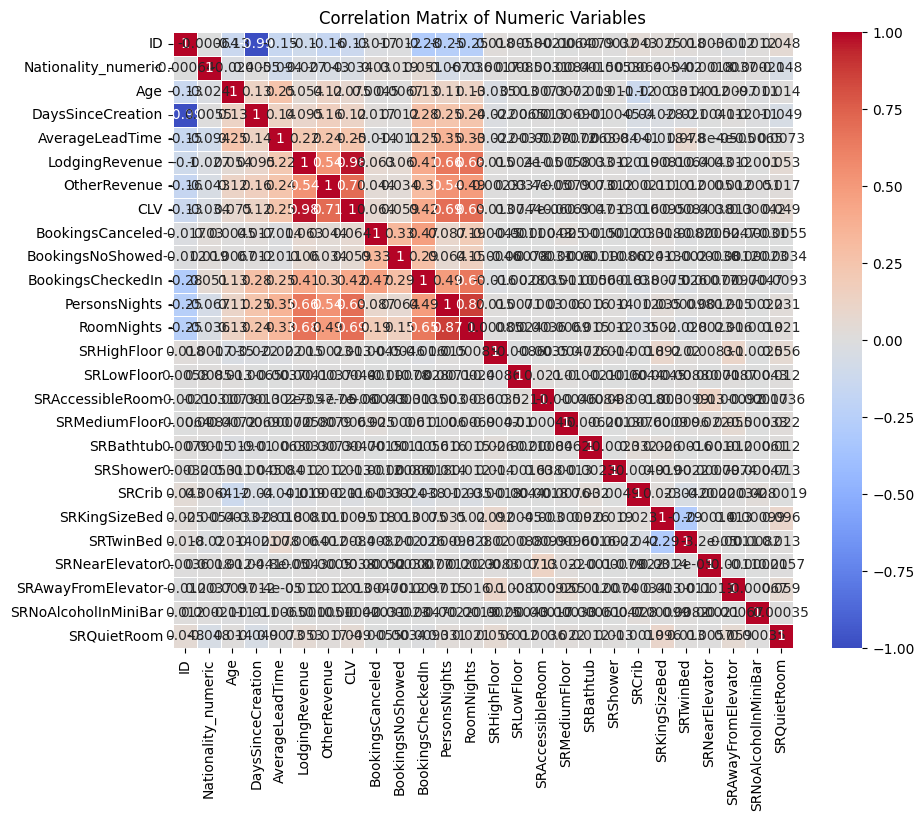

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Filter out only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Display the correlation matrix
print(correlation_matrix)

# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


Theshold with Correlation focusing strong correlation pairs

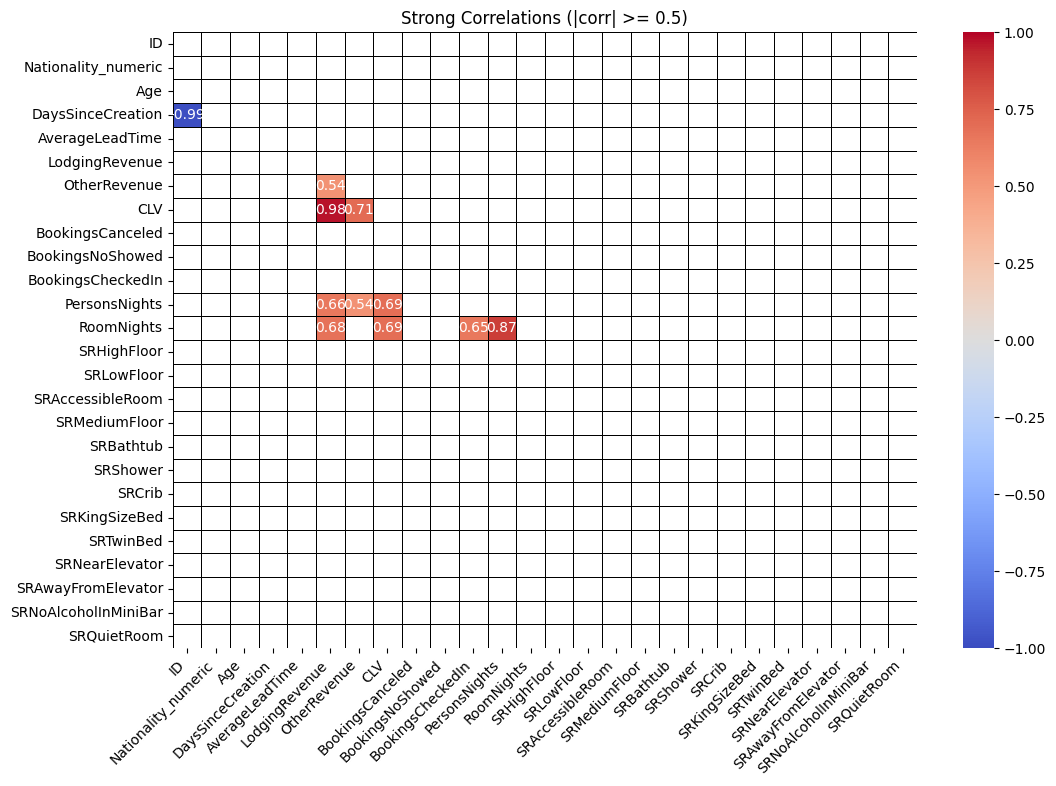

In [24]:
# Define a threshold for strong correlations
threshold = 0.5

# Filter the correlation matrix
strong_corr_matrix = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# To avoid a cluttered heatmap, you can mask the upper triangle and the diagonal
mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))

# Set the figure size before plotting the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Plot the filtered heatmap
sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, cbar=True, linewidths=0.5, linecolor='black')

# Add title and adjust x-axis labels for better readability
plt.title('Strong Correlations (|corr| >= 0.5)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.show()



Segmentation Analysis

Determining number of Clusters

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

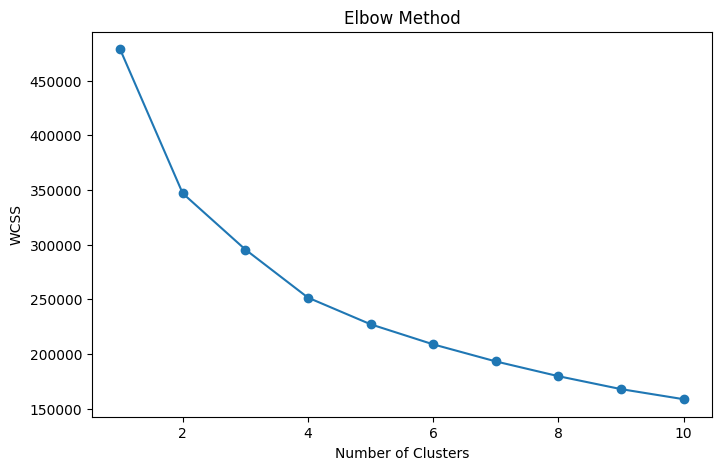

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Select segmentation variables
segmentation_vars = df[['Age', 'Nationality_numeric','LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights']]  

# Step 2: Standardize the data
scaler = StandardScaler()
segmentation_data = scaler.fit_transform(segmentation_vars)

# Step 3: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()






K-mean with Clustering

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


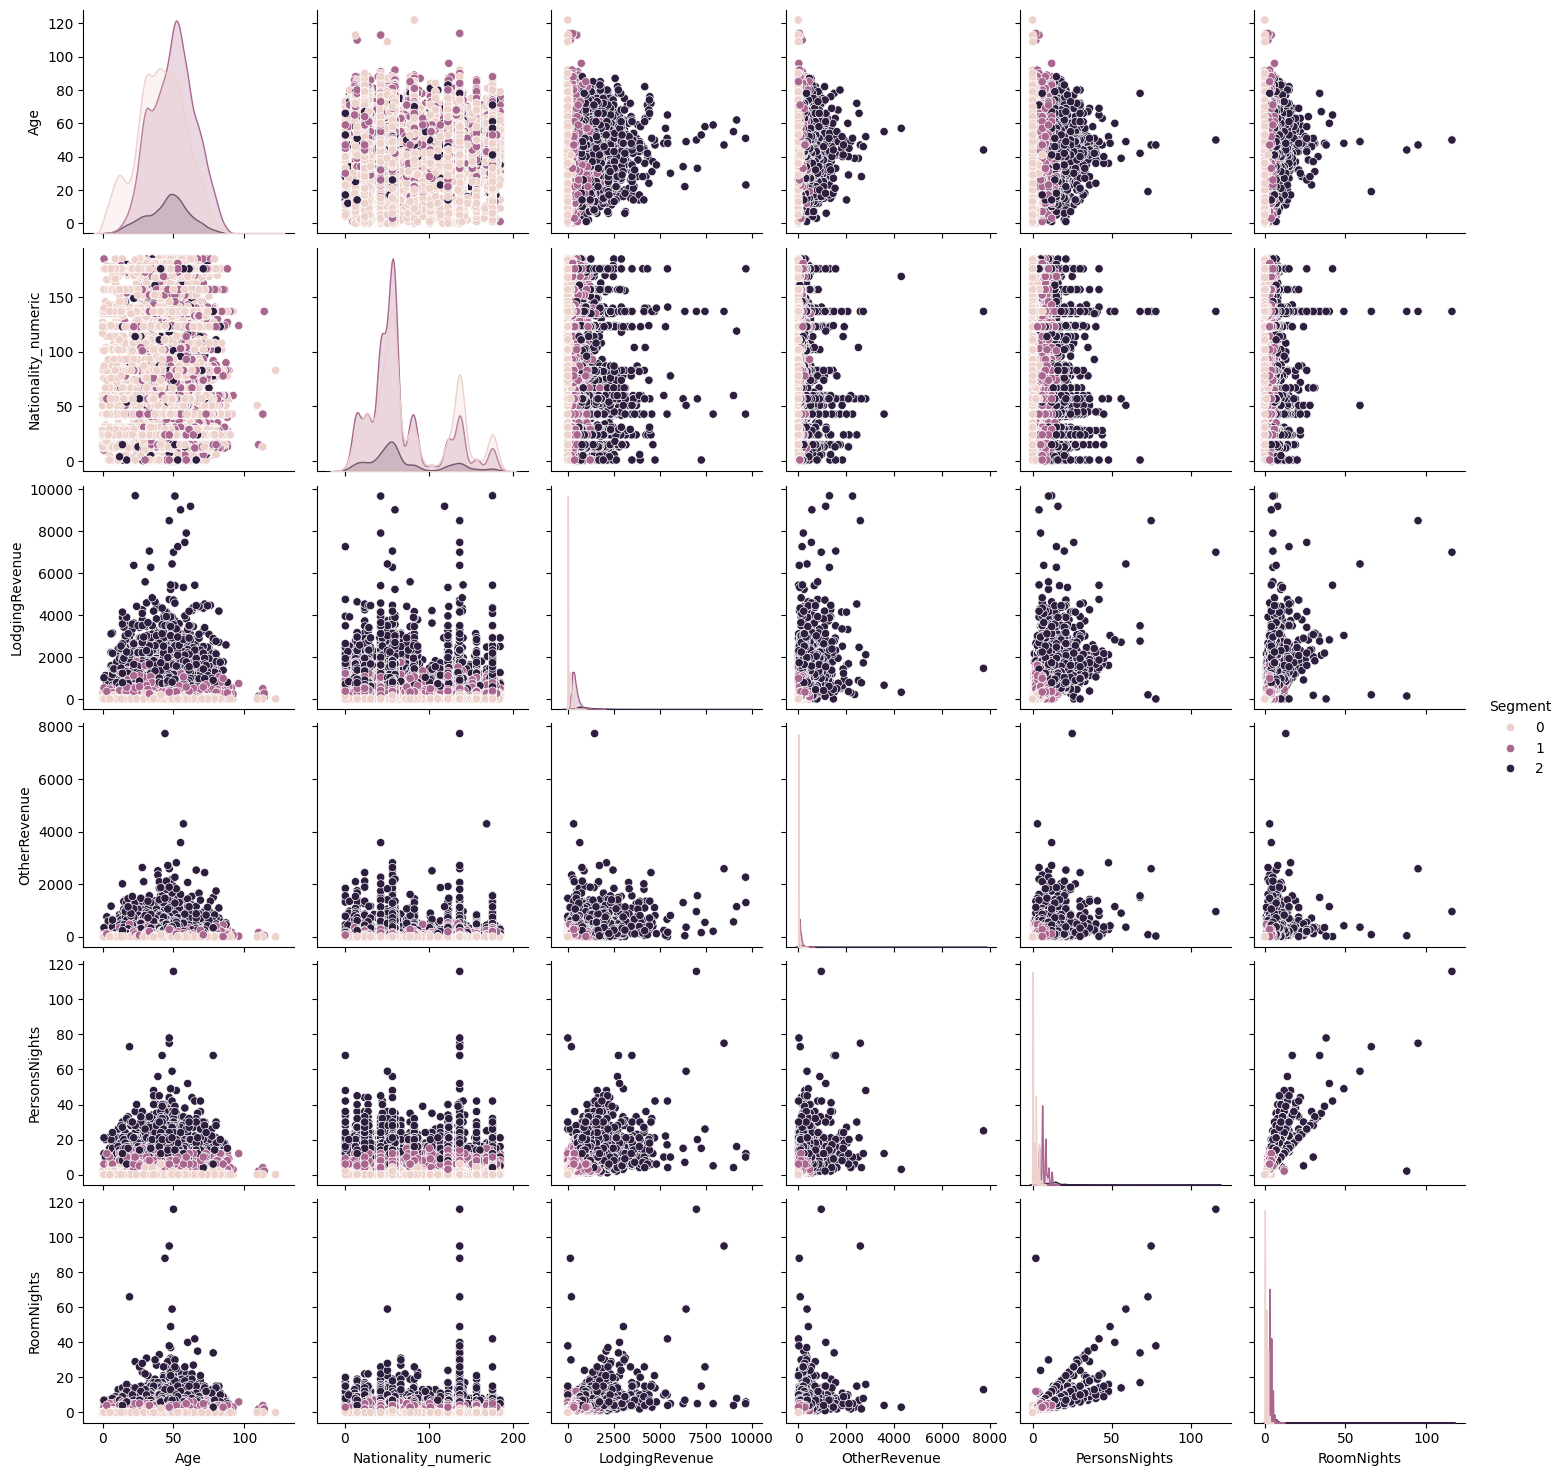

                   ID  Nationality_numeric        Age  DaysSinceCreation  \
Segment                                                                    
0        49260.170604            78.988119  40.997822         360.239050   
1        36093.554546            66.922085  49.639046         524.288843   
2        39276.920171            68.791938  45.828281         482.809078   

         AverageLeadTime  LodgingRevenue  OtherRevenue          CLV  \
Segment                                                               
0              24.189376       79.261694     12.496836    91.758530   
1             102.435079      388.864039     86.140426   475.004465   
2             101.685764     1073.789173    279.938495  1353.727669   

         BookingsCanceled  BookingsNoShowed  ...  SRBathtub  SRShower  \
Segment                                      ...                        
0                0.000606          0.000165  ...   0.002536  0.001213   
1                0.000699          0.000349 

In [26]:
# Step 4: Fit K-Means with the optimal number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(segmentation_data)

# Step 5: Analyze the segments
# Calculate mean values of numeric variables in each segment
numeric_columns = df.select_dtypes(include=[np.number]).columns
segment_summary = df.groupby('Segment')[numeric_columns].mean()

# Visualize the segments using pair plots
sns.pairplot(df, hue='Segment', vars=['Age','Nationality_numeric', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights'])
plt.show()

# Display the segment summary
print(segment_summary)

Extracting data to CSV file for Visualisation in Tableau

In [28]:
import pandas as pd

#Export the entire DataFrame, including all columns and the 'Segment' column
csv_file_path = 'HotelCustomerSegmentsFull.csv'
df.to_csv(csv_file_path, index=False)

csv_file_path  


'HotelCustomerSegmentsFull.csv'

In [29]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include='object'))

                 ID  Nationality_numeric           Age  DaysSinceCreation  \
count  79785.000000         79785.000000  79785.000000       79785.000000   
mean   42331.615805            72.555994     45.409062         446.422097   
std    24011.329806            44.727443     16.556461         310.594124   
min        1.000000             0.000000      0.000000           0.000000   
25%    21690.000000            43.000000     34.000000         174.000000   
50%    42387.000000            57.000000     46.000000         385.000000   
75%    63199.000000           101.000000     57.000000         703.000000   
max    83590.000000           186.000000    122.000000        1095.000000   

       AverageLeadTime  LodgingRevenue  OtherRevenue           CLV  \
count     79785.000000    79785.000000  79785.000000  79785.000000   
mean         66.798797      302.184450     67.960983    370.145433   
std          87.976927      368.063977    112.650911    439.057110   
min           0.000000    

Extracting Basic Statistic

In [30]:
%pip install openpyxl


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:

 #Assuming df is your DataFrame
basic_stats = df.describe()

# Exporting to an Excel file
basic_stats.to_excel('basic_statistics.xlsx', index=True)

In [32]:


# Assuming df is your DataFrame with the 'Segment' column already added
# Select the columns you are interested in for analysis
columns_to_analyze = ['Age', 'Nationality_numeric', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'CLV', 'BookingsCanceled', 'BookingsNoShowed']

# Group by 'Segment' and calculate the mean for each selected column
segment_summary_table = df.groupby('Segment')[columns_to_analyze].mean()

# Optionally, round the values for better readability
segment_summary_table = segment_summary_table.round(2)

# Display the segment summary table
print(segment_summary_table)


           Age  Nationality_numeric  AverageLeadTime  LodgingRevenue  \
Segment                                                                
0        41.00                78.99            24.19           79.26   
1        49.64                66.92           102.44          388.86   
2        45.83                68.79           101.69         1073.79   

         OtherRevenue      CLV  BookingsCanceled  BookingsNoShowed  
Segment                                                             
0               12.50    91.76              0.00               0.0  
1               86.14   475.00              0.00               0.0  
2              279.94  1353.73              0.02               0.0  


In [33]:
# Export the segment summary table to an Excel file
segment_summary_file_path = 'Segment_Summary_Table.xlsx'
segment_summary_table.to_excel(segment_summary_file_path, index=True)

